<a href="https://colab.research.google.com/github/DenisseCardona/Tareas_EstadisticaAplicada_24/blob/main/EDCP_1888872_EstadisticaAplicadaG51_parcial1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
hrdz = yf.download("HERDEZ.MX", start = "2018-01-01", end = "2021-12-31", progress = False)

In [ ]:
# Renombar columna
hrdz.rename(columns = {'Adj Close':'adj_close'}, inplace=True)

In [ ]:
# Calcular retornos
hrdz['retorno_simple'] = hrdz.adj_close.pct_change()

In [ ]:
print('Rango de fechas:', min(hrdz.index.date), '-', max(hrdz.index.date))
print('Numero de observaciones:', hrdz.shape[0])
print(f'Media: {hrdz.retorno_simple.mean():.4f}')
print(f'Mediana: {hrdz.retorno_simple.median():.4f}')
print(f'Mínimo: {hrdz.retorno_simple.min():.4f}')
print(f'Máximo: {hrdz.retorno_simple.max():.4f}')
print(f'Desviación Estándar: {hrdz.retorno_simple.std():.4f}')
print(f'Skewness (símetría): {hrdz.retorno_simple.skew():.4f}') # que tan centrada esta la dist
print(f'Kurtosis: {hrdz.retorno_simple.kurtosis():.4f}')     # que tan alta esta la dist

Rango de fechas: 2018-01-02 - 2021-12-30
Numero de observaciones: 1006
Media: 0.0002
Mediana: -0.0002
Mínimo: -0.0964
Máximo: 0.1289
Desviación Estándar: 0.0226
Skewness (símetría): 0.6735
Kurtosis: 3.4492


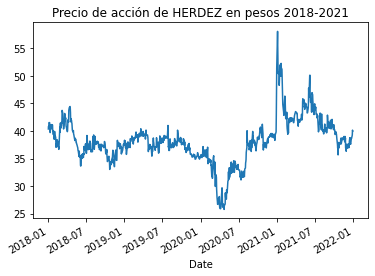

In [ ]:
# Grafica de la evolución de la accion
hrdz['adj_close'].plot()
plt.title('Precio de acción de HERDEZ en pesos 2018-2021')
plt.show()

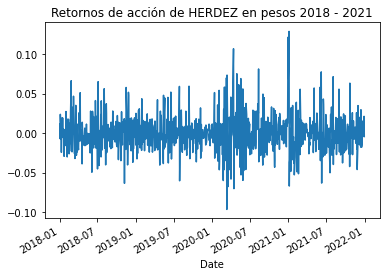

In [ ]:
#graficamos los retornos
hrdz['retorno_simple'].plot()
plt.title('Retornos de acción de HERDEZ en pesos 2018 - 2021')
plt.show()

###MEDIA MOVIL SIMPLE
La estrategia más simple de todas. Los operadores tratarán de situarse en posiciones cortas cuando caiga el precio por debajo de la MM, y situarse en posiciones largas si sube por encima de la misma. La ventaja de esta estrategia es que nunca nos perdemos una tendencia: el inconveniente es que en los mercados en rango veremos que asumimos posiciones que se eliminan muy rápido.




In [ ]:
# Calculo del promedio movil de la acción a 10 días y a 50 días

hrdz['MA10'] = hrdz['adj_close'].rolling(10).mean()
hrdz['MA50'] = hrdz['adj_close'].rolling(50).mean()
hrdz = hrdz.dropna()
hrdz.head()

,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50
Date,,,,,,,,,
2018-08-02,40.130001,41.299999,40.009998,41.000000,36.896530,111976,0.018381,36.776843,36.267673
2018-08-03,41.099998,44.090000,40.509998,43.310001,38.975342,195139,0.056342,36.856936,36.318248
2018-08-06,42.500000,42.799999,41.820000,42.490002,38.237411,171795,-0.018933,36.905532,36.372243
2018-08-07,42.490002,44.000000,42.250000,43.650002,39.281315,381256,0.027301,37.138610,36.450536
2018-08-08,43.750000,43.750000,42.299999,43.070000,38.759361,463969,-0.013288,37.388787,36.498591


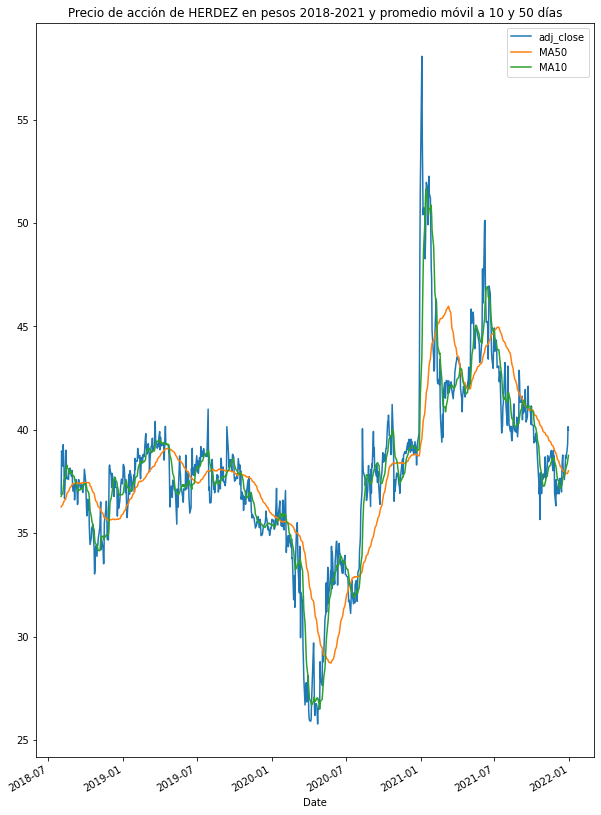

In [ ]:
# Graficamos
hrdz[['adj_close', 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Precio de acción de HERDEZ en pesos 2018-2021 y promedio móvil a 10 y 50 días')
plt.show()

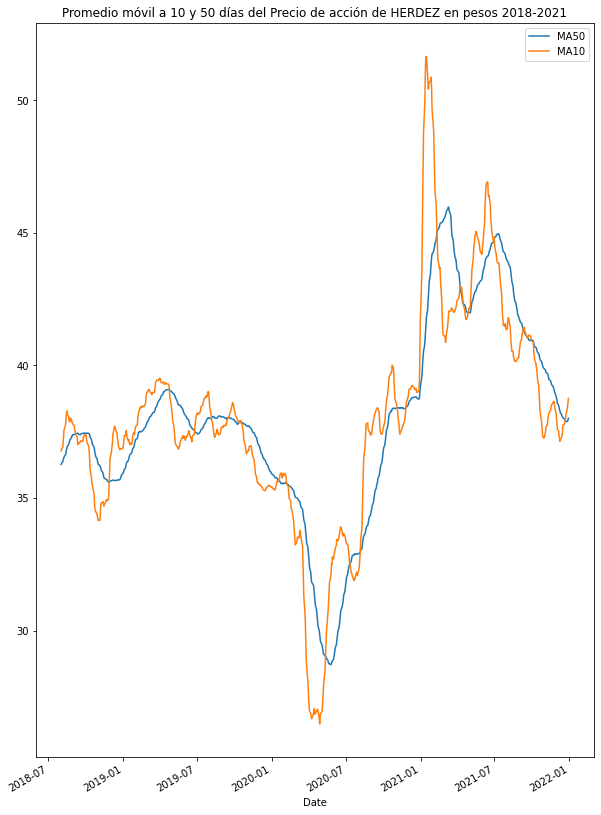

In [ ]:
# Graficamos
hrdz[[ 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Promedio móvil a 10 y 50 días del Precio de acción de HERDEZ en pesos 2018-2021')
plt.show()

In [ ]:
# Añadimos una nueva columna llamada "Shares", si MA10 > MA50, asignamos un 1, sino, colocamos un 0 

hrdz['Shares'] = [1 if hrdz.loc[ei, 'MA10']>hrdz.loc[ei, 'MA50'] else 0 for ei in hrdz.index]

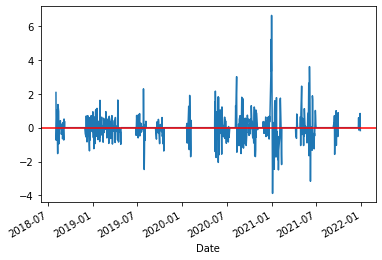

In [ ]:
#Añadimos una nueva columna llamada "Profit" usando 1 y 0 creados con anterioridad
#Shares=1, significa que mantenemos o compramos la acciónpor lo que la ganancia 
#es el precio de hoy menos el precio de ayer.
# Si share=0, las ganacias son cero porque no tenemos la acción en el portafolio 0.

#graficamos las pérdidas y ganacias de esta estrategia

hrdz['close_ayer'] = hrdz['adj_close'].shift(-1)
hrdz['Profit'] = [hrdz.loc[ei, 'close_ayer'] - hrdz.loc[ei, 'adj_close'] if hrdz.loc[ei, 'Shares']==1 else 0 for ei in hrdz.index]
hrdz['Profit'].plot()
plt.axhline(y=0, color='red')
plt.show()

In [ ]:
# Usamos .cumsum() para calcular las ganacias del periodo

hrdz['ganancia_acumulada'] = hrdz['Profit'].cumsum()
hrdz.tail()

,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50,Shares,close_ayer,Profit,ganancia_acumulada
Date,,,,,,,,,,,,,
2021-12-24,38.759998,38.970001,38.400002,38.619999,38.619999,2852,-0.003612,38.152000,37.8856,1,39.070000,0.450001,3.798492
2021-12-27,38.410000,39.450001,38.410000,39.070000,39.070000,75018,0.011652,38.359999,37.8868,1,39.310001,0.240002,4.038494
2021-12-28,38.790001,39.889999,38.700001,39.310001,39.310001,84458,0.006143,38.482000,37.9012,1,40.150002,0.840000,4.878494
2021-12-29,39.509998,40.299999,39.220001,40.150002,40.150002,178929,0.021369,38.642000,37.9528,1,39.980000,-0.170002,4.708492
2021-12-30,40.230000,40.299999,39.669998,39.980000,39.980000,70192,-0.004234,38.762000,38.0146,1,NaN,NaN,NaN


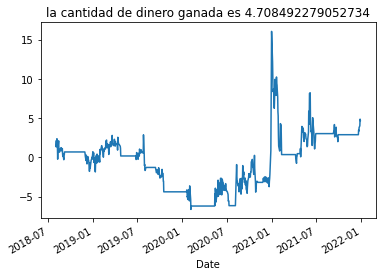

In [ ]:
#graficamos la ganacia acumulada del periodo

hrdz['ganancia_acumulada'].plot()
plt.title('la cantidad de dinero ganada es {}'.format(hrdz.loc[hrdz.index[-2], 'ganancia_acumulada']))
plt.show()

## MEDIAS MOVILES

En consideracion con la gráfica de media movil vemos que cuando la línea rápida (media móvil de 10 días) cruza la lenta (media movil de 50 días) eso quiere decir que debemos tomar una posición corta, por ejemplo, en el gráfico podemos ver una fuerte caida a inicios del 2020. Lo análogo tambien es cierto, cuando la media movil cruza la lenta con una dirección hacia arriba, por ejemplo a mediados del 2020, significa que tenemos que tomar una posicion larga.

Esta es la estrategia más básica de trading aunque no es completamente efectiva pero eso sí, nos da una visión de la tendencia de HERDEZ.

## MA10 > MA50

Gracias a la columna que añadimos "Profit" se pudo establecer lo que fue la ganancia de la empresa y conocer la estrategia a llevar a cabo. En esta columna obtuvimos valores de 1, los cuales quieren decir que podemos mantener o incluso comprar la acción. Por lo tanto las ganancias que se tuvieron de esta acción son las mencionadas en el gráfico. (4.71)

## Plantear y calcular ganancias de una estrategia de inversion alternativa

Podemos plantear estrategias alternativas que permiten, por ejemplo, beneficiarse del anuncio de una operación corporativa de fusión o adquisición sin la preocupación del movimiento que vaya a tener el mercado, puesto que compraremos la compañía adquirida, conociendo su precio, y venderemos la que va a adquirirla —o el índice—, para recoger ese diferencial en el precio de ambas empresas.